import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline  
import numpy as np  # That gives numerical arrays and tools for manipulating them

import scipy.optimize as opt
import scipy.linalg as la
def eulot_func(lam,Ia_arr,fa_arr):
        """compute the Euler-Lotka sum, taking as arguments a scalar and two 1-D numpy arrays"""
        length_of_array=Ia_arr.size
        age_arr=np.arange(0,length_of_array)
        temp_arr=lam**(-(age_arr+1))*Ia_arr*fa_arr 
        return sum(temp_arr) -1 


In [20]:
A=3
p0=0.5
p1=0.9
p2=0.95
f0=0
f1=1
f2=5
f3=0.5

In [21]:
Ia_arr=np.array([1,.5,.45, 0.4275])
fa_arr=np.array([0,1,5, 0.5])

In [22]:
t_min=1
t_max=50

t_arr=np.linspace(t_min,t_max,100) 

G_arr=np.zeros(t_arr.size)

iter_arr=np.arange(t_arr.size)


In [ ]:
A_mat=np.array([[0 ,1,5, 0.5],[.5 ,0 ,0, 0],[0 , .45 , 0, 0],[0, 0, 0.4275, 0]])
print(A_mat)
n_zero=np.array([100,1200,300, 3600])

n_vs_t=np.zeros([4,t_max])

n_vs_t[:,0]=n_zero 
iter_arr=np.arange(t_max-1)

for t in iter_arr:
    n_vs_t[:,t+1]=np.dot(A_mat,n_vs_t[:,t])

[0.197 7.448]
1.2178592008958025
[0.19  7.678]
1.2094358844199666


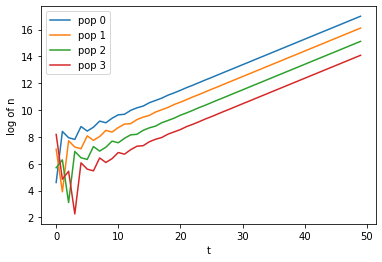

In [24]:
generation_arr=np.arange(t_max)
plt.plot(generation_arr,np.log(n_vs_t[0,:]),label="pop 0")
plt.plot(generation_arr,np.log(n_vs_t[1,:]),label="pop 1")
plt.plot(generation_arr,np.log(n_vs_t[2,:]),label="pop 2")
plt.plot(generation_arr,np.log(n_vs_t[3,:]),label="pop 3")
plt.xlabel('t')
plt.ylabel('log of n')
plt.legend()
p=np.polyfit(generation_arr,np.log(n_vs_t[0,:]),1)
lambda_estimate=np.exp(p[0])
np.set_printoptions(precision=3, suppress=True)
print(p)
print(lambda_estimate)
generation_arr_after_squiggles=np.arange(15,t_max)

p=np.polyfit(generation_arr_after_squiggles,np.log(n_vs_t[0,generation_arr_after_squiggles]),1)
lambda_estimate=np.exp(p[0])

print(p)
print(lambda_estimate)
# The lambda estimate is 1.21.

Text(0.5, 0, 't')

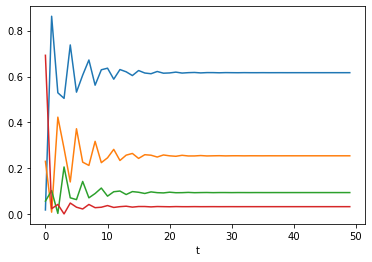

In [55]:
#plot of w_a
generation_arr=np.arange(t_max)
plt.plot(generation_arr,(n_vs_t[0,:])/((n_vs_t[0,:])+(n_vs_t[1,:])+(n_vs_t[2,:])+(n_vs_t[3,:])),label="pop 0/n")
plt.plot(generation_arr,(n_vs_t[1,:])/((n_vs_t[0,:])+(n_vs_t[1,:])+(n_vs_t[2,:])+(n_vs_t[3,:])), label="pop 1/n")
plt.plot(generation_arr,(n_vs_t[2,:])/((n_vs_t[0,:])+(n_vs_t[1,:])+(n_vs_t[2,:])+(n_vs_t[3,:])),label="pop 2/n")
plt.plot(generation_arr,(n_vs_t[3,:])/((n_vs_t[0,:])+(n_vs_t[1,:])+(n_vs_t[2,:])+(n_vs_t[3,:])),label="pop 3/n")
plt.xlabel('t')

In [56]:
A=3
p0=0.5
p1=0.9
p2=0.95
f0=0
f1=1
f2=5
f3=0.5
lambda_min=.5
lambda_max=5

Ia_arr=np.array([1,.5,.45, 0.4275])
fa_arr=np.array([0,1,5, 0.5])

t_min=1
t_max=50

t_arr=np.linspace(t_min,t_max,100) 

G_arr=np.zeros(t_arr.size)

iter_arr=np.arange(t_arr.size)

lambda_arr=np.linspace(lambda_min,lambda_max,100) 

G_arr=np.zeros(lambda_arr.size)

iter_arr=np.arange(lambda_arr.size)

for j in iter_arr:
    G_arr[j]=eulot_func(lambda_arr[j],Ia_arr,fa_arr) 

Text(0, 0.5, 'G')

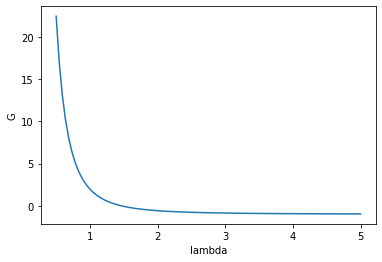

In [57]:
plt.plot(lambda_arr,G_arr)
plt.xlabel('lambda')
plt.ylabel('G')

In [58]:
#search for root between left_bracket and right_bracket
left_bracket=0.1
right_bracket=5

#The first argument of eulot_func is variable we want to solve with respect to.  
#The next arguments are parameters, which we pass like this:
args=(Ia_arr,fa_arr)

opt.brentq(eulot_func,left_bracket,right_bracket,args)

1.4623759092509627

In [59]:
#  The growth rate using the Euler-Lotka formula is 1.46.There is 
# approximately a 0.25 difference between the two values from the 
# Euler-lotka formulas and from thesimulations above. I can not 
# explain why the difference is there.

In [69]:
#Part II
#a) This is true because owls start producing offspring at age a=3,
# so it does not matter in the Euler-Lotka forumla what the
#individual p values are as long as they get to age a=3 with the 
# same probability.
#b)Projection matrix
#f_0-3 = 0, f_3-50 = 0.24
A=50
p0=0.072
p1=1
p2=1
p3=0.942
f0=0
f1=0
f2=0
f3=0.24
f4=0.24
A_mat=np.zeros((50, 50))
iter_arr1=np.arange(0,3)
iter_arr2=np.arange(3,50)
iter_arr3=np.arange(0,50)
for j in iter_arr2:
    A_mat[j,j-1]=0.942
for j in iter_arr2:
    A_mat[0, j]=0.24
A_mat[1, 0] = 0.0722
A_mat[2, 1] = 1
A_mat[3, 2] = 1
print(A_mat)
#The projection matrix for the population.

[[0.    0.    0.    ... 0.24  0.24  0.24 ]
 [0.072 0.    0.    ... 0.    0.    0.   ]
 [0.    1.    0.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.942 0.    0.   ]
 [0.    0.    0.    ... 0.    0.942 0.   ]]


In [ ]:
#c) Long-term growth rate of the population

[0.   0.   0.   0.24 0.24 0.24 0.24 0.24 0.24 0.24 0.24 0.24 0.24 0.24
 0.24 0.24 0.24 0.24 0.24 0.24 0.24 0.24 0.24 0.24 0.24 0.24 0.24 0.24
 0.24 0.24 0.24 0.24 0.24 0.24 0.24 0.24 0.24 0.24 0.24 0.24 0.24 0.24
 0.24 0.24 0.24 0.24 0.24 0.24 0.24 0.24]


Text(0, 0.5, 'G')

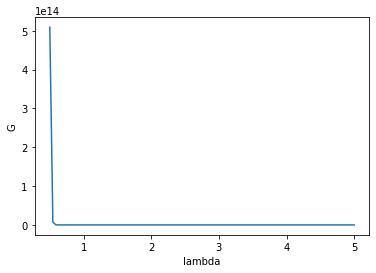

In [70]:
a_min = 0
a_mid = 3
a_max = 50
iter_arr1=np.arange(0,3)
iter_arr2=np.arange(3,50)
iter_arr3=np.arange(0,50)
Ia_arr=np.zeros(50)
fa_arr=np.zeros(50)
for j in iter_arr1:
    Ia_arr[j]=0.0722
for j in iter_arr2:
    Ia_arr[j]=0.942
for j in iter_arr2:
    fa_arr[j]=0.24
print(fa_arr)


lambda_arr=np.linspace(lambda_min,lambda_max,100) 

G_arr=np.zeros(lambda_arr.size)

iter_arr=np.arange(lambda_arr.size)

for j in iter_arr3:
    G_arr[j]=eulot_func(lambda_arr[j],Ia_arr,fa_arr) 
plt.plot(lambda_arr,G_arr)
plt.xlabel('lambda')
plt.ylabel('G')

In [71]:

left_bracket=0.1
right_bracket=5

args=(Ia_arr,fa_arr)

opt.brentq(eulot_func,left_bracket,right_bracket,args)

1.1488708642606218

In [52]:
#The long term growth rate for the population is 1.149.